**Analisis de la desigualdad en Argentina y el mundo usando datos disponibles en el World Data Bank**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wbgapi as wb
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

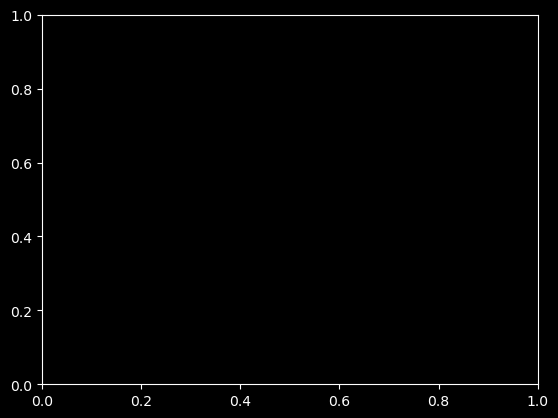

In [22]:
# Establecer el estilo de gráfico
plt.style.use('dark_background')

# Crear una figura y un eje
fig, ax = plt.subplots()

# Establecer los colores de los ejes y las etiquetas
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

**DATA**

In [2]:
# Base de datos de Estadísticas de homicidios internacionales de la Oficina de las Naciones Unidas contra la Droga y el Delito.
h_i = wb.data.DataFrame('VC.IHR.PSRC.P5')

In [3]:
# Intentional homicides, female (per 100,000 female)
h_f = wb.data.DataFrame('VC.IHR.PSRC.FE.P5')

In [4]:
# Intentional homicides, male (per 100,000 male)
h_m = wb.data.DataFrame('VC.IHR.PSRC.MA.P5')

In [206]:
# population
pobl_t = wb.data.DataFrame('SP.POP.TOTL')

In [5]:
# Population density (people per sq. km of land area)
# Food and Agriculture Organization and World Bank population estimates.
d_p = wb.data.DataFrame('EN.POP.DNST')

In [6]:
# GINI
g = wb.data.DataFrame('SI.POV.GINI')

In [362]:
# GNI per capita, Atlas method (current US$)
gni = wb.data.DataFrame('NY.GNP.PCAP.CD')

In [269]:
gdp_pcap = wb.data.DataFrame('NY.GDP.PCAP.CD')

In [270]:
gdp = wb.data.DataFrame('NY.GDP.MKTP.CD')

In [13]:
# Quantiles
q1 = wb.data.DataFrame('SI.DST.FRST.20')
q2 = wb.data.DataFrame('SI.DST.02ND.20')
q3 = wb.data.DataFrame('SI.DST.03RD.20')
q4 = wb.data.DataFrame('SI.DST.04TH.20')
q5 = wb.data.DataFrame('SI.DST.05TH.20')

In [8]:
# Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)
# World Bank, Poverty and Inequality Platform. Data are based on primary household survey data obtained from government statistical agencies and World Bank country departments. Data for high-income economies are mostly from the Luxembourg Income Study database. 
p_2 = wb.data.DataFrame('SI.POV.DDAY') 

In [7]:
# Poverty gap at $3.65 a day (2017 PPP) (%)
p_4 = wb.data.DataFrame('SI.POV.LMIC.GP')

In [12]:
#Porcentaje de población viviendo con menos de $5.50 al día (enfoque de pobreza alta):
p_6 = wb.data.DataFrame('SI.POV.GAPS') 

In [9]:
#La proporción de la población que no tiene acceso a servicios básicos de vivienda (housing) y que vive por debajo de la línea de pobreza.
# Tasa de incidencia de la pobreza, sobre la base de la línea de pobreza nacional (% de la población)
sin_casa = wb.data.DataFrame('SI.POV.NAHC') 

In [10]:
#Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)
bajo_mitad = wb.data.DataFrame('SI.POV.UMIC') 

***ARGENTINA***

**Gente viviendo con menos de 2,15 dolares**

In [129]:
p_2.loc['ARG'].dropna()[:5]

YR1980    0.3
YR1986    1.1
YR1987    1.2
YR1991    1.0
YR1992    1.7
Name: ARG, dtype: float64

In [20]:
p2 = p_2.loc['ARG'].to_frame().dropna()

In [32]:
p2

,ARG
YR1980,0.3
YR1986,1.1
YR1987,1.2
YR1991,1.0
YR1992,1.7
YR1993,2.0
YR1994,1.9
YR1995,3.9
YR1996,4.2
YR1997,3.8


In [131]:
lista_valores_p2 = p2['ARG'].tolist()


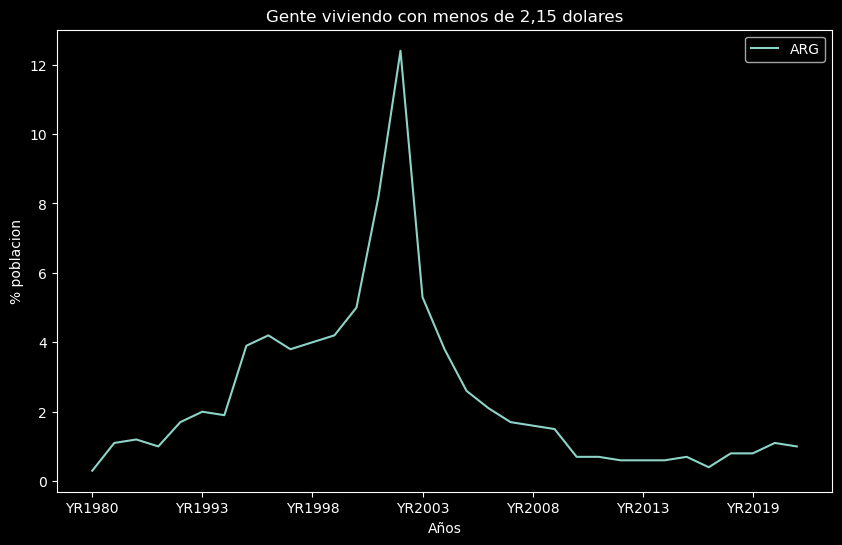

In [135]:
p2.plot(kind='line', title='Gente viviendo con menos de 2,15 dolares', xlabel='Años', ylabel='% poblacion',figsize=(10, 6))
# fig, ax = plt.subplots(figsize=(10, 6))
# mostrar gráfica
plt.show()

**El porcentaje de los ingresos del pais que va al 20% mas pobre aumento**

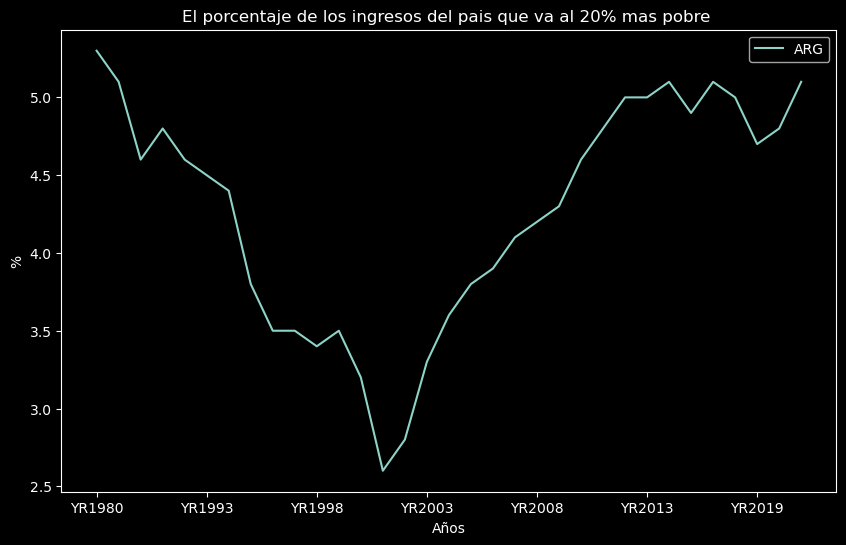

In [136]:
qq1 = q1.loc['ARG'].to_frame().dropna()
qq1.plot(kind='line', title='El porcentaje de los ingresos del pais que va al 20% mas pobre ', xlabel='Años', ylabel='%',figsize=(10, 6))
# fig, ax = plt.subplots(figsize=(10, 6))
# mostrar gráfica
plt.show()

**>>>Si contrasto esta grafica con la anterior tiene sentido porque dentro del 20% mas pobre estara la gente que vive con menos de 2,15 dolares al dia**

***Quantiles de 20%, del mas pobre al mas rico, vamos a ver cuanto se lleva cada uno del ingreso total***

In [425]:
def graf(df):    
    qq1 = df.loc['ARG'].to_frame().dropna()
    qq1.plot(kind='line', title='', xlabel='Años', ylabel='',figsize=(10, 6))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # mostrar gráfica
    plt.show()

**Clase Alta**

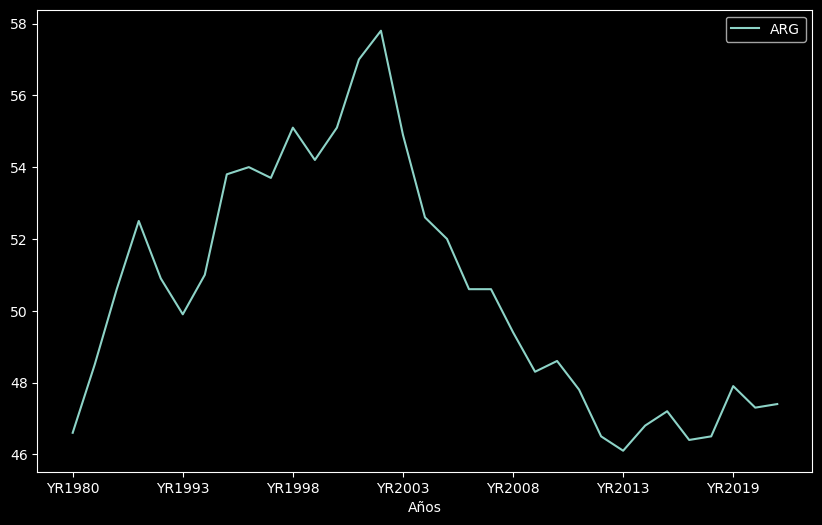

In [426]:
graf(q5)

**Clase Media**

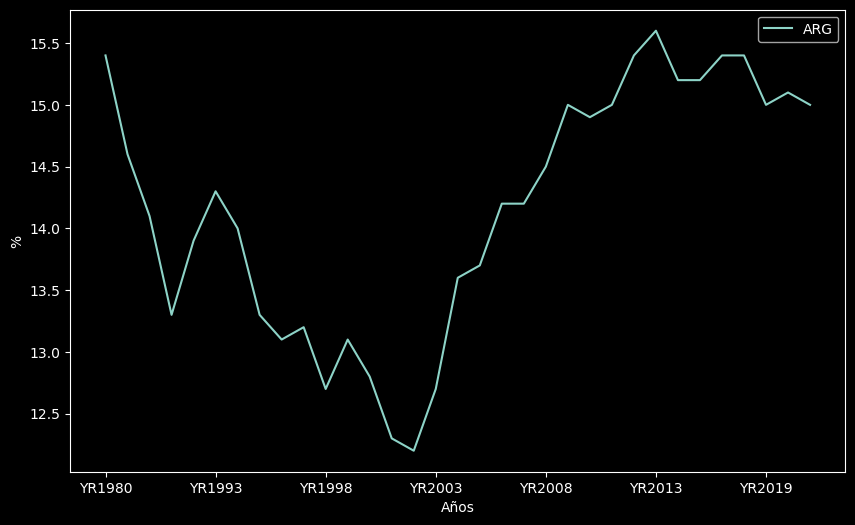

In [139]:
graf(q3)

In [40]:
q1.loc['ARG'].to_frame().dropna()['ARG'].tolist()

[5.3,
 5.1,
 4.6,
 4.8,
 4.6,
 4.5,
 4.4,
 3.8,
 3.5,
 3.5,
 3.4,
 3.5,
 3.2,
 2.6,
 2.8,
 3.3,
 3.6,
 3.8,
 3.9,
 4.1,
 4.2,
 4.3,
 4.6,
 4.8,
 5.0,
 5.0,
 5.1,
 4.9,
 5.1,
 5.0,
 4.7,
 4.8,
 5.1]

In [46]:
result = pd.concat([q1.loc['ARG'].to_frame().dropna()['ARG'],
                    q2.loc['ARG'].to_frame().dropna()['ARG'],
                    q3.loc['ARG'].to_frame().dropna()['ARG'],
                    q4.loc['ARG'].to_frame().dropna()['ARG'],
                    q5.loc['ARG'].to_frame().dropna()['ARG']], axis=1)



In [51]:
result.columns = ['BAJA','media Baja' ,'MEDIA' ,'media Alta' ,'ALTA']

**Distribucion de la riqueza entre los quantiles a lo largo de los años**

In [52]:
result

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1980,5.3,10.2,15.4,22.6,46.6
YR1986,5.1,9.9,14.6,21.8,48.5
YR1987,4.6,9.3,14.1,21.5,50.6
YR1991,4.8,9.1,13.3,20.3,52.5
YR1992,4.6,9.2,13.9,21.5,50.9
YR1993,4.5,9.3,14.3,22.0,49.9
YR1994,4.4,9.0,14.0,21.6,51.0
YR1995,3.8,8.4,13.3,20.8,53.8
YR1996,3.5,8.2,13.1,21.2,54.0
YR1997,3.5,8.2,13.2,21.3,53.7


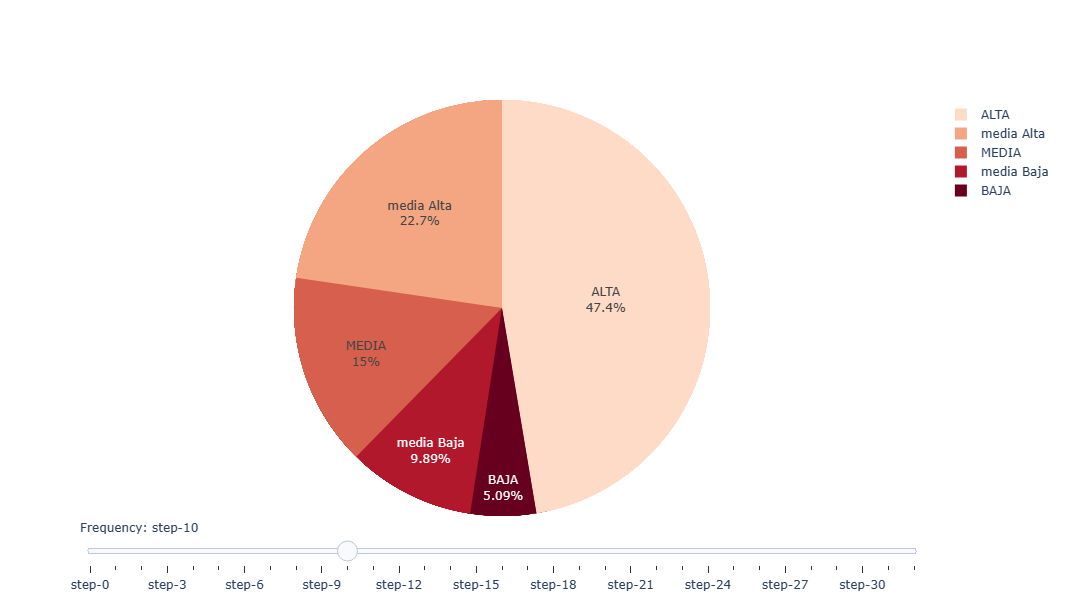

In [126]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in range(len(result)):
    fig.add_trace(
        go.Pie(labels=result.columns, values=result.iloc[step].tolist(), marker=dict(colors=px.colors.sequential.RdBu)))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    # fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

# # Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "año: " + result.index.tolist()[i]}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active= 10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 0},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,width=800, height=600
    # margin=dict(t=0, b=0, l=0, r=0)
)

fig.show()

**GNI = GDP + Money flowing from foreign countries - Money flowing to foreign countries**



**Si contrastamos los ingresos de la clase media , quantil central de 20%, con los ingresos de la clase alta, cuantil del 20% de mayores ingresos, podemos ver que hay una coincidencia con la baja de ingresos relativos de la clase alta con la ganancia de la clase media. Ahora, ya que estos valores son relativos porque estamos pensando en quien se queda con tal porcion de la torta, tenemos que introducir el ingreso en dolares total a este estudio ya que estamos en la duda de si es necesario que la clase alta gane menos para que los otros ganen mas o es que cuando el pais se enriquecio o empobrecio los jugadores pudieron ganar o perder con distintas capacidades** 

**Entonces vamos a untroducir "Gross National Income" (GNI) per capita que significa el ingreso total en dolares de un pais dividido en su poblacion.** Atlas Method

** Info sobre GNI: https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1144 **

In [144]:
gni = gni.loc['ARG'].to_frame().dropna()

**GNI en funcion de los años**

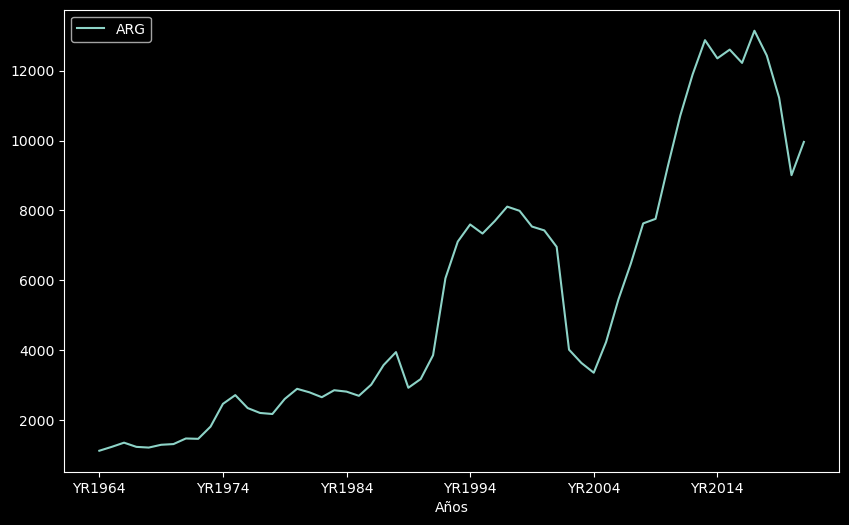

In [427]:
graf(gni)

**Hay una caida en 2004, esto esta cerca de la inflexion que estamos buscando entender** 

**La inflexion se dio antes de 2003 por lo que se podria decir que la ganancia alrededor de 1994 en el GNI fue principalmente de la clase alta, el comienzo de la caida de la porcion de la clase media se fue abajo alrededor de 1993 lo que coincide con el comienzo de la ganancia en GNI. 
Por lo tanto entre 1993 y 2003 la clase alta gano y las demas perdieron simultaneamente no solo en la competencia por quien se lleva la porcion mas grande de la torta.**

**Clase media y GNI**

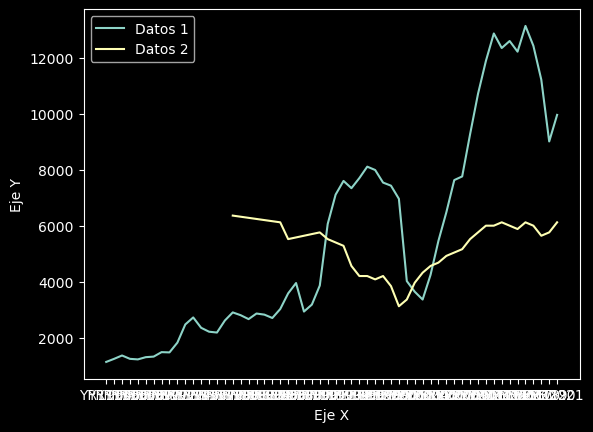

In [156]:

df1 = gni.loc['ARG'].to_frame().dropna()
df2 = q1.loc['ARG'].to_frame().dropna().apply(lambda x: x * 1200)

x1 = df1.index
y1 = df1['ARG']

x2 = df2.index
y2 = df2['ARG']

fig, ax = plt.subplots()

ax.plot(x1, y1, label='Datos 1')
ax.plot(x2, y2, label='Datos 2')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.legend()

plt.show()


**Clase Alta y GNI**

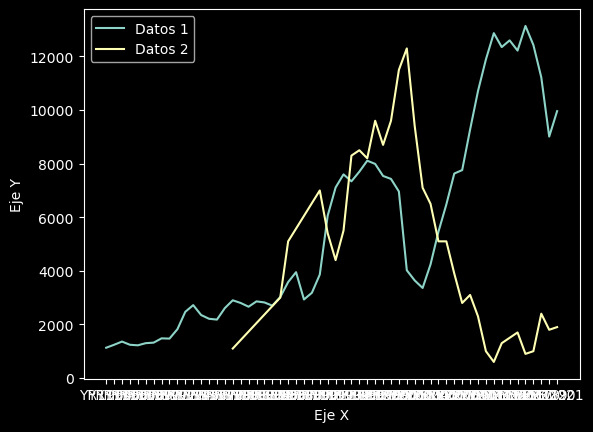

In [169]:
df1 = gni.loc['ARG'].to_frame().dropna()
df2 = q5.loc['ARG'].to_frame().dropna().apply(lambda x: x * 1000).apply(lambda x: x -45500)

x1 = df1.index
y1 = df1['ARG']

x2 = df2.index
y2 = df2['ARG']

fig, ax = plt.subplots()

ax.plot(x1, y1, label='Datos 1')
ax.plot(x2, y2, label='Datos 2')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.legend()

plt.show()

**Podemos ver que es lo contrario a partir del año 2003 hasta el final**

**Comparamos las clases**

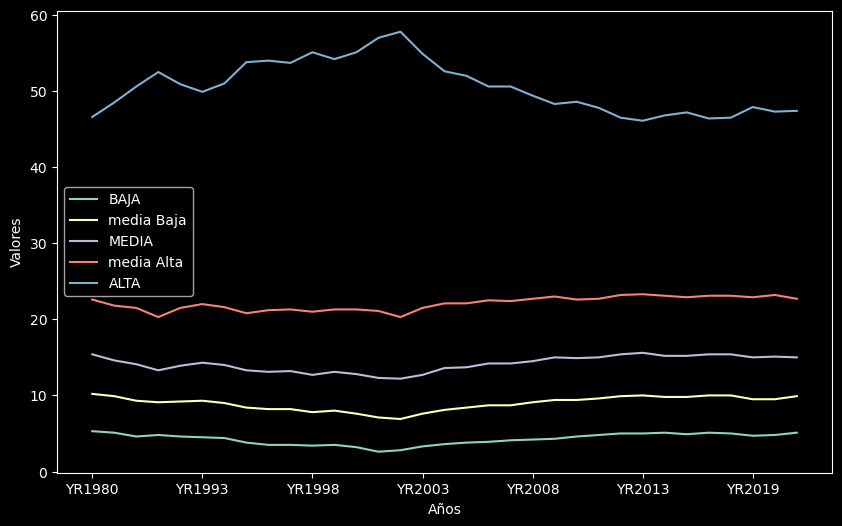

In [201]:
# crear gráfica
result.plot(kind='line', title='', xlabel='Años', ylabel='Valores',figsize=(10, 6))
# fig, ax = plt.subplots(figsize=(10, 6))
# mostrar gráfica
plt.show()

**A nivel visual se puede distinguir que en la zona discutida el aumento en la porcion de la ALTA se dio una baja para todas las demas, es la unica que aprovecho el aumento del GNI**

**A partir de 2003 todas las demas clases acompañaron el crecimiento**

**Tasa de incidencia de la pobreza, sobre la base de la línea de pobreza nacional:** 

In [347]:
sin_casa.loc['ARG'].to_frame().dropna()

,ARG
YR2016,30.3
YR2017,25.7
YR2018,32.0
YR2019,35.5
YR2020,42.0


**Entonces los dos quantiles mas pobres se consideran bajo la linea de pobreza nacional**

**>>>*Me interesa ver cual es la clase mas vario en la porcion de ingresos totales***

In [174]:
result.max()


BAJA           5.3
media Baja    10.2
MEDIA         15.6
media Alta    23.3
ALTA          57.8
dtype: float64

In [175]:
result.min()

BAJA           2.6
media Baja     6.9
MEDIA         12.2
media Alta    20.3
ALTA          46.1
dtype: float64

**La variacion mas grande fue para la clase alta**

In [176]:
result.max()-result.min()

BAJA           2.7
media Baja     3.3
MEDIA          3.4
media Alta     3.0
ALTA          11.7
dtype: float64

**Pero si lo pensamos con un foco en los sectores mas vulnerables, tomamos a la *BAJA* y a la *MEDIA BAJA***

**>Entre ambas tienen una variacion de la porcion de la torta de 6%**

**>>> Podriamos ver cuanto gana cada sector en promedio tomando la porcion de la torta y multiplicamos por el GNI**

In [332]:
gdp_pcap.loc['ARG'].to_frame().dropna()[:5]

,ARG
YR1962,1163.186836
YR1963,855.275656
YR1964,1179.504098
YR1965,1285.260799
YR1966,1277.968419


In [331]:
gni.loc['ARG'].to_frame().dropna()[:5]

,ARG
YR1964,1130.0
YR1965,1240.0
YR1966,1360.0
YR1967,1240.0
YR1968,1220.0


In [273]:
clase_GNI = result.mul(gni.loc['ARG'].to_frame().dropna()['ARG'], axis=0) * (0.01)# para obtener las proprciones a partir de %

In [255]:
c_GDP= result.mul(gdp.loc['ARG'].to_frame().dropna()['ARG'], axis=0) * (0.01)

In [330]:
clase_GNI.dropna()[:5]

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1980,153.70,295.80,446.60,655.40,1351.40
YR1986,154.02,298.98,440.92,658.36,1464.70
YR1987,164.68,332.94,504.78,769.70,1811.48
YR1991,185.28,351.26,513.38,783.58,2026.50
YR1992,278.76,557.52,842.34,1302.90,3084.54


In [256]:
c_GDP.dropna()

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1980,4.078982e+09,7.850116e+09,1.185214e+10,1.739339e+10,3.586426e+10
YR1986,5.657657e+09,1.098251e+10,1.619643e+10,2.418371e+10,5.380320e+10
YR1987,5.110885e+09,1.033288e+10,1.566597e+10,2.388783e+10,5.621973e+10
YR1991,9.106559e+09,1.726452e+10,2.523276e+10,3.851316e+10,9.960299e+10
YR1992,1.052428e+10,2.104855e+10,3.180162e+10,4.918955e+10,1.164534e+11
YR1993,1.065338e+10,2.201698e+10,3.385407e+10,5.208318e+10,1.181341e+11
YR1994,1.132736e+10,2.316960e+10,3.604160e+10,5.560704e+10,1.312944e+11
YR1995,9.805206e+09,2.167467e+10,3.431822e+10,5.367060e+10,1.388211e+11
YR1996,9.525241e+09,2.231628e+10,3.565162e+10,5.769575e+10,1.469609e+11
YR1997,1.025006e+10,2.401444e+10,3.865739e+10,6.237897e+10,1.572653e+11


**Ahora necesito introducir la poblacion para ver con que plata se manejaba cada persona de cada clase**

In [251]:
pobl_t.loc['ARG'].to_frame().dropna()

,ARG
YR1960,20349744.0
YR1961,20680653.0
YR1962,21020359.0
YR1963,21364017.0
YR1964,21708487.0
...,...
YR2017,44044811.0
YR2018,44494502.0
YR2019,44938712.0
YR2020,45376763.0


**La poblacion por año de cada clase:**

In [274]:
clase_pop = pobl_t.loc['ARG'].to_frame().dropna()*0.2

In [242]:
clase_pop

,ARG
YR1960,4069948.8
YR1961,4136130.6
YR1962,4204071.8
YR1963,4272803.4
YR1964,4341697.4
...,...
YR2017,8808962.2
YR2018,8898900.4
YR2019,8987742.4
YR2020,9075352.6


**Ahora divido el gni de cada clase por la poblacion**

In [275]:
clase_distrGNI = clase_GNI.div(clase_pop['ARG'], axis = 0)

In [257]:
clase_distrGDP = c_GDP.div(clase_pop['ARG'], axis = 0)

In [250]:
clase_distrGNI.dropna()

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1980,0.000027,0.000053,0.000080,0.000117,0.000241
YR1986,0.000025,0.000049,0.000072,0.000107,0.000238
YR1987,0.000026,0.000053,0.000081,0.000123,0.000290
YR1991,0.000028,0.000053,0.000078,0.000118,0.000306
YR1992,0.000042,0.000083,0.000125,0.000194,0.000459
YR1993,0.000047,0.000097,0.000149,0.000230,0.000521
YR1994,0.000048,0.000099,0.000154,0.000238,0.000562
YR1995,0.000040,0.000088,0.000140,0.000218,0.000565
YR1996,0.000038,0.000089,0.000143,0.000231,0.000587
YR1997,0.000040,0.000093,0.000149,0.000241,0.000608


In [276]:
clase_distrGNI.dropna()*(1000000/12)*500

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1980,1142.589061,2198.944985,3319.975761,4872.172221,10046.160420
YR1986,1043.552745,2025.720034,2987.425505,4460.676439,9923.981986
YR1987,1099.046497,2221.985310,3368.816438,5136.847760,12089.511472
YR1991,1165.960138,2210.466095,3230.681216,4931.039751,12752.689011
YR1992,1730.055616,3460.111233,5227.776754,8086.129512,19143.441495
YR1993,1958.908510,4048.410920,6224.975931,9576.886048,21722.118808
YR1994,2019.985524,4131.788572,6427.226668,9916.292573,23413.468575
YR1995,1662.798330,3675.659465,5819.794154,9101.632962,23541.723719
YR1996,1586.517252,3716.983275,5938.107427,9609.761638,24477.694738
YR1997,1651.090701,3868.269642,6226.970644,10048.066266,25332.448756


**Uso el dolar a 173, dolar 2021, y estimo que el 0.25 del GDP va al bolsillo de la gente por una noticia que dice que si ganas 75000 en 2021 sos del 20% nas rico**

In [280]:
clase_distrGDP.dropna()*(1/12)*0.25*173 # si solo un 25% va al bolsillo de la gente

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1980,2622.914211,5047.872632,7621.297895,11184.502106,23061.849475
YR1986,3315.812584,6436.577370,9492.326222,14173.473400,31532.727519
YR1987,2950.444216,5965.028525,9043.752924,13790.119707,32454.886381
YR1991,4957.076096,9397.790098,13735.231681,20964.300987,54218.019795
YR1992,5649.863578,11299.727156,17072.413856,26406.971072,62516.968723
YR1993,5642.030753,11660.196890,17929.119948,27583.261459,62563.852128
YR1994,5918.706427,12106.444964,18832.247722,29055.467913,68603.188129
YR1995,5056.299317,11177.082701,17697.047611,27676.585737,71586.553492
YR1996,4850.406318,11363.809087,18154.377932,29379.603982,74834.840331
YR1997,5157.328082,12082.882935,19450.494481,31386.025184,79128.148000


**Existiran razones por las cuales los ingresos de las personas estan distribuidos de esta forma**

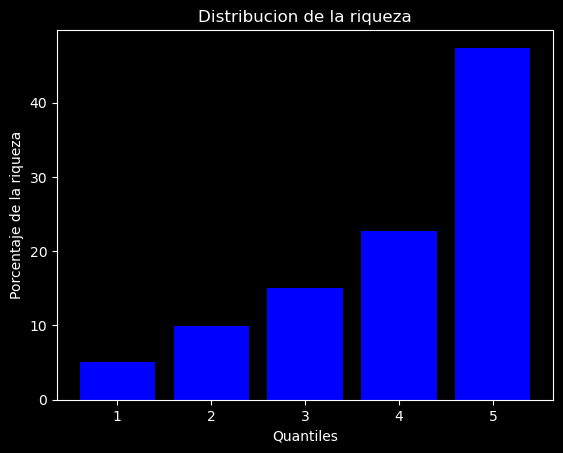

In [282]:
import matplotlib.pyplot as plt

valores = [q1['YR2021']['ARG'] , q2['YR2021']['ARG'] , q3['YR2021']['ARG'] , q4['YR2021']['ARG'] , q5['YR2021']['ARG'] ]  # Valores de los cinco pilares

x = [1, 2, 3, 4, 5]

plt.bar(x, valores,color='blue')
plt.xlabel('Quantiles')
plt.ylabel('Porcentaje de la riqueza')
plt.title('Distribucion de la riqueza')
plt.show()

**Se sabe que la desigualdad esta relacionada con la violencia. Podemos estudiar esto en argentina comparando el indice de GINI con la cantidad de homisidios por cada 100000 personas**

**Primero: El indice de GINI es un numero de 0 a 1 que indica la desigualdad. Podemos pensar que si el 20% mas pobre de 
la poblacion se lleva un porcentaje pequeño de la torta el Indice de GINI es grande para ese pais**

In [288]:
q1.loc['ARG'].to_frame().dropna()[:5]

,ARG
YR1980,5.3
YR1986,5.1
YR1987,4.6
YR1991,4.8
YR1992,4.6


In [289]:
g.loc['ARG'].to_frame().dropna()[:5]

,ARG
YR1980,40.8
YR1986,42.8
YR1987,45.3
YR1991,46.8
YR1992,45.5


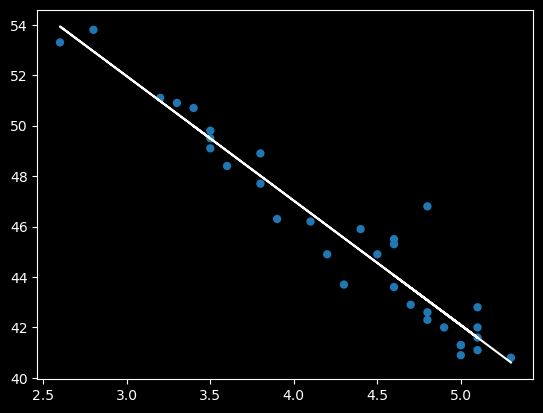

In [293]:
# Separar las columnas en dos variables
x = q1.loc['ARG'].to_frame().dropna().values.reshape(-1, 1)
y = g.loc['ARG'].to_frame().dropna().values.reshape(-1, 1)
# x='YR2020_x', y='YR2020_y'
# Crear un modelo de regresión lineal y ajustarlo a los datos
modelo = LinearRegression().fit(x, y)

# Predecir los valores de y a partir de los valores de x
y_pred = modelo.predict(x)

# Crear el gráfico de puntos y la recta ajustada
plt.scatter(x, y, color='#1f77b4', edgecolors='none')
plt.plot(x, y_pred, color='white')

# Mostrar el gráfico
plt.show()

**Mientras mas pequeño es GINI mas grande es la porcion para el 20% mas pobre**

**Ahora Homisidios vs. GINI**

In [308]:
h_i.loc['ARG'].to_frame().dropna()[:5]

,ARG
YR2001,8.394221
YR2002,9.474084
YR2003,7.789882
YR2004,6.073994
YR2005,5.651414


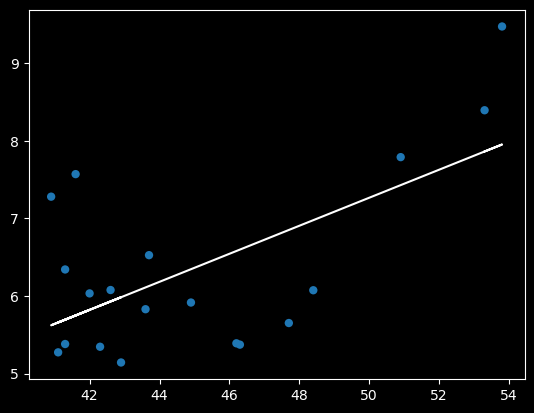

In [309]:
df = pd.merge( g.loc['ARG'], h_i.loc['ARG'], left_index=True, right_index=True)
df.columns = [ 'gini' , 'homi' ]
df = df.dropna()
# Separar las columnas en dos variables
x = df['gini'].values.reshape(-1, 1)
y = df['homi'].values.reshape(-1, 1)
    # x='YR2020_x', y='YR2020_y'
    # Crear un modelo de regresión lineal y ajustarlo a los datos
modelo = LinearRegression().fit(x, y)

    # Predecir los valores de y a partir de los valores de x
y_pred = modelo.predict(x)
# Crear el gráfico de puntos y la recta ajustada
plt.scatter(x, y, color='#1f77b4', edgecolors='none')
plt.plot(x, y_pred, color='white')

# Mostrar el gráfico
plt.show()

**Hay una tendencia de que a medida que GINI aumenta los homisidios aumentan**

In [312]:
    # Obtener los coeficientes de la recta
    m = modelo.coef_[0][0]
    b = modelo.intercept_[0]

    # Imprimir la ecuación de la recta
    print(f"Ecuación de la recta: y = {m}x + {b}")

Ecuación de la recta: y = 0.1806564697272221x + -1.7663956054633019


**La pendiente es positiva**

**Veamos como se compara con otros paises**

**Que indices de GINI tienen otros paises y en que lugar esta argentina**

In [318]:
g.sort_values(by='YR2020')['YR2020'].dropna()

economy
SVN    24.0
BLR    24.4
ARM    25.1
UKR    25.6
BEL    26.0
NLD    26.0
CZE    26.2
FIN    27.1
DNK    27.5
SWE    28.9
KGZ    29.0
IRL    29.2
ALB    29.4
HRV    29.5
HUN    29.7
AUT    29.8
FRA    30.7
EST    30.7
MLT    31.4
CYP    31.7
GBR    32.6
LUX    33.4
GRC    33.6
GEO    34.5
ROU    34.6
PRT    34.7
ESP    34.9
THA    35.0
SRB    35.0
ITA    35.2
LVA    35.7
RUS    36.0
LTU    36.0
VNM    36.8
IDN    37.6
GMB    38.8
DOM    39.6
USA    39.7
URY    40.2
BGR    40.5
ARG    42.3
PRY    43.5
BOL    43.6
PER    43.8
CHL    44.9
MEX    45.4
ECU    47.3
BRA    48.9
CRI    49.2
COL    53.5
Name: YR2020, dtype: float64

**En 2020 Argenina es uno de los 10 paises mas desiguales economicamente**

**Tomemos un puñado de paises para comparar**

In [319]:
paises = [
    ["SVN", "Slovenia", 24.0],
    ["UKR", "Ukraine", 25.6],
    ["FIN", "Finland", 27.1],
    ["SWE", "Sweden", 28.9],
    ["IRL", "Ireland", 29.2],
    ["FRA", "France", 30.7], 
    ["ESP", "Spain", 34.9],
    ["ITA", "Italy", 35.2],
    ["RUS", "Russia", 36.0],
    ["USA", "United States", 39.7],
    ["URY", "Uruguay", 40.2],
    ["ARG", "Argentina", 42.3],
    ["MEX", "Mexico", 45.4],
    ["BRA", "Brazil", 48.9], 
]

In [ ]:
for p in paises:
    valores = [q1['YR2021']['ARG'] , q2['YR2021']['ARG'] , q3['YR2021']['ARG'] , q4['YR2021']['ARG'] , q5['YR2021']['ARG'] ]  # Valores de los cinco pilares

    x = [1, 2, 3, 4, 5]

    plt.bar(x, valores,color='blue')
    plt.xlabel('Quantiles')
    plt.ylabel('Porcentaje de la riqueza')
    plt.title('Distribucion de la riqueza')
    plt.show()

Slovenia GINI: 24.0 Homisidios: 0.529117835503999


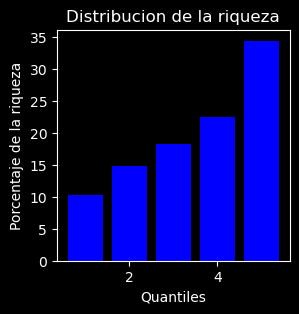

Ukraine GINI: 25.6 Homisidios: nan


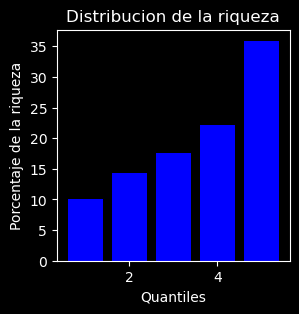

Finland GINI: 27.1 Homisidios: 1.64238641995496


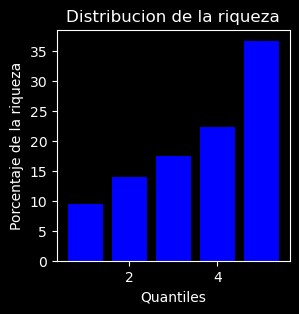

Sweden GINI: 28.9 Homisidios: 1.2278115150897


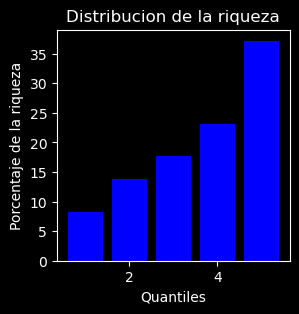

Ireland GINI: 29.2 Homisidios: 0.688566315821877


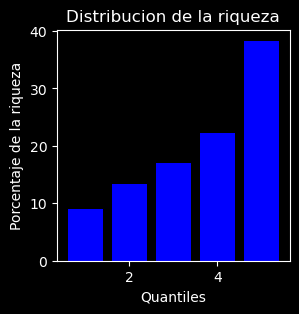

France GINI: 30.7 Homisidios: 1.34664119191258


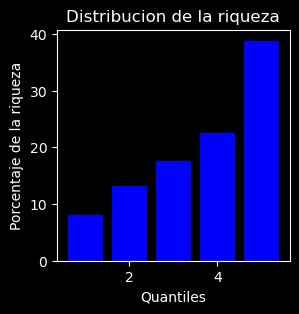

Spain GINI: 34.9 Homisidios: 0.637367945863421


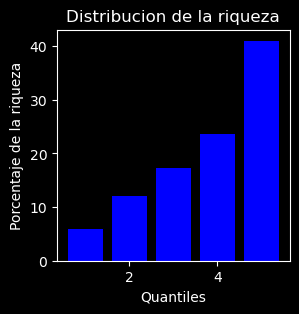

Italy GINI: 35.2 Homisidios: 0.471371788494387


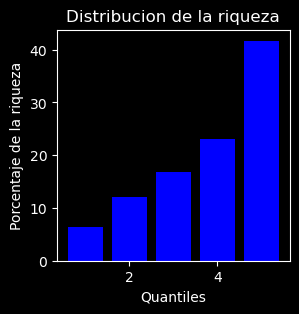

Russia GINI: 36.0 Homisidios: 7.33000279714606


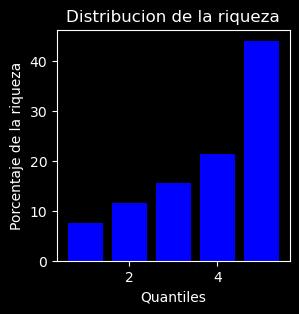

United States GINI: 39.7 Homisidios: 6.51656420137329


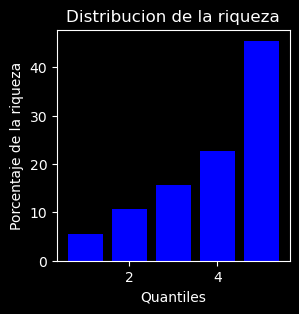

Uruguay GINI: 40.2 Homisidios: 9.70139564795967


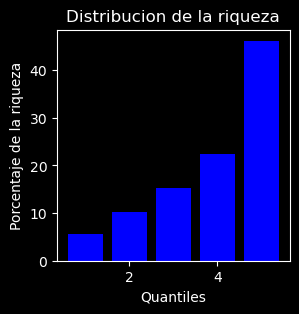

Argentina GINI: 42.3 Homisidios: 5.34563218151997


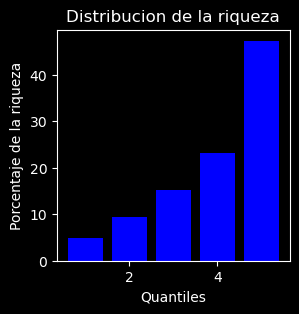

Mexico GINI: 45.4 Homisidios: 28.3706033950892


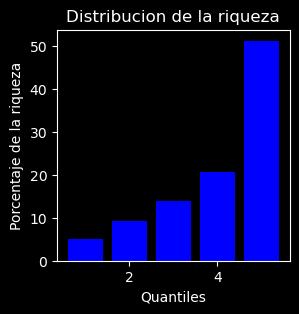

Brazil GINI: 48.9 Homisidios: 22.4511350612572


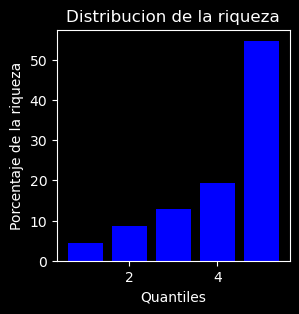

In [327]:
yy = '2020'
for pais in paises:
    valores = [q1['YR'+yy][pais[0]] , q2['YR'+yy][pais[0]] , q3['YR'+yy][pais[0]] , q4['YR'+yy][pais[0]] , q5['YR'+yy][pais[0]]]
    x = [1, 2, 3, 4, 5]
    fig, ax = plt.subplots(figsize=(3, 3))
    # HR['YR2020']['ARG']
    print(pais[1]+ ' GINI: '+ str(pais[2]) + ' Homisidios: '+str(h_i['YR2020'][pais[0]]) )
    plt.bar(x, valores,color='blue')
    plt.xlabel('Quantiles')
    plt.ylabel('Porcentaje de la riqueza')
    plt.title('Distribucion de la riqueza')   
    # plt.plot(figsize=(3, 3))
    # ,figsize=(10, 6)
    plt.show()

**Vemos que el pais mas cercano a la igualdad tiene al quantil mas pobre ganando un 10% e la torta**

**Los homisidios no llegan a ser ni una persona por cada 100000**

**Argentina, un pais de tercer mundo es mas desigual que USA, un pais capitalista de primer mundo. La cantidad de homisidios es casi la misma**

**>>>Seria interesante ver si los paises mas desiguales son en general los mas pobres**

In [340]:
g.sort_values(by='YR2020')['YR2020'].dropna()[:5]

economy
SVN    24.0
BLR    24.4
ARM    25.1
UKR    25.6
BEL    26.0
Name: YR2020, dtype: float64

In [339]:
gdp.sort_values(by='YR2020')['YR2020'].dropna()

economy
TUV    5.505471e+07
NRU    1.146266e+08
KIR    1.809118e+08
MHL    2.417224e+08
PLW    2.519000e+08
           ...     
IBT    3.240440e+13
PST    4.969780e+13
OED    5.251705e+13
HIC    5.387455e+13
WLD    8.511634e+13
Name: YR2020, Length: 252, dtype: float64

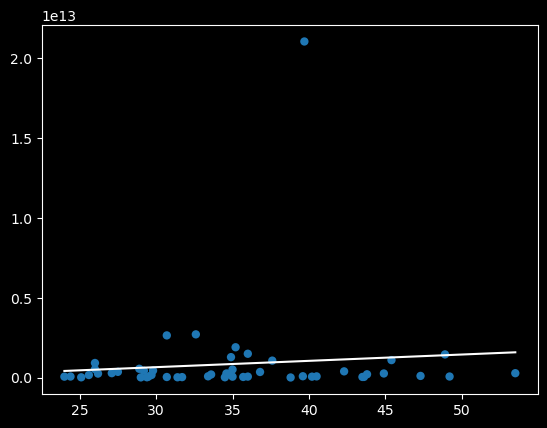

In [341]:
df = pd.merge( g.sort_values(by='YR2020')['YR2020'].dropna(), gdp.sort_values(by='YR2020')['YR2020'].dropna(), left_index=True, right_index=True)
df.columns = [ 'gini' , 'gdp' ]
df = df.dropna()
# Separar las columnas en dos variables
x = df['gini'].values.reshape(-1, 1)
y = df['gdp'].values.reshape(-1, 1)
    # x='YR2020_x', y='YR2020_y'
    # Crear un modelo de regresión lineal y ajustarlo a los datos
modelo = LinearRegression().fit(x, y)

    # Predecir los valores de y a partir de los valores de x
y_pred = modelo.predict(x)
# Crear el gráfico de puntos y la recta ajustada
plt.scatter(x, y, color='#1f77b4', edgecolors='none')
plt.plot(x, y_pred, color='white')

# Mostrar el gráfico
plt.show()

In [342]:
    # Obtener los coeficientes de la recta
    m = modelo.coef_[0][0]
    b = modelo.intercept_[0]

    # Imprimir la ecuación de la recta
    print(f"Ecuación de la recta: y = {m}x + {b}")

Ecuación de la recta: y = 39600681651.197586x + -539536690342.21545


**Al parecer hay una tendencia a que la desigualdad se de en paises mas ricos**

**Los paises donde hay una mayor facilidad de hacer negocios seran mas desiguales?**

**Ease of doing business rank (1=most business-friendly regulations)**

In [414]:
e_b = wb.data.DataFrame('IC.BUS.EASE.XQ')

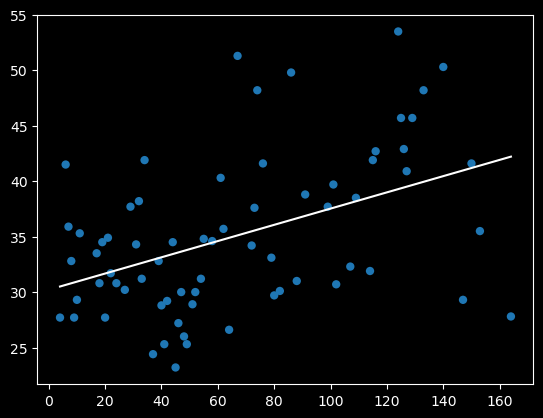

In [421]:
df = pd.merge( e_b.sort_values(by='YR2019')['YR2019'].dropna(), g.sort_values(by='YR2019')['YR2019'].dropna(), left_index=True, right_index=True)
df.columns = [ 'gini' , 'gdp' ]
df = df.dropna()
# Separar las columnas en dos variables
x = df['gini'].values.reshape(-1, 1)
y = df['gdp'].values.reshape(-1, 1)
    # x='YR2020_x', y='YR2020_y'
    # Crear un modelo de regresión lineal y ajustarlo a los datos
modelo = LinearRegression().fit(x, y)

    # Predecir los valores de y a partir de los valores de x
y_pred = modelo.predict(x)
# Crear el gráfico de puntos y la recta ajustada
plt.scatter(x, y, color='#1f77b4', edgecolors='none')
plt.plot(x, y_pred, color='white')

# Mostrar el gráfico
plt.show()

In [422]:
    # Obtener los coeficientes de la recta
    m = modelo.coef_[0][0]
    b = modelo.intercept_[0]

    # Imprimir la ecuación de la recta
    print(f"Ecuación de la recta: y = {m}x + {b}")

Ecuación de la recta: y = 0.07320129600579388x + 30.20815771648616


**Hay una tendencia de mayor igualdad mayor facilidad de hacer negocios**

**Esto es importante porque la libertad economica de un pais en parte es la facilidad de hacer negocios.**

**Finalmente quiero ver Finlandia mas a fondo ya que al contrario de Argentina es un pais de primer mundo y ademas tiene menor desigualdad**

**Para el quantil mas pobre:**

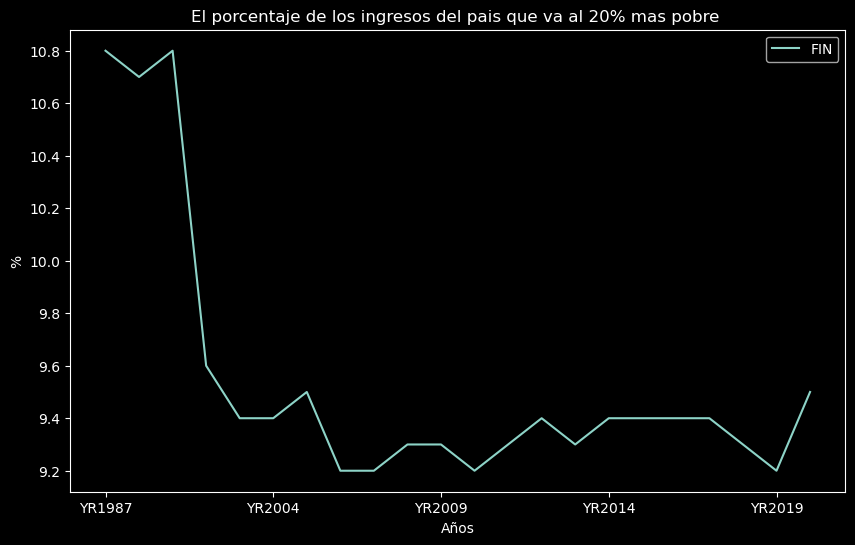

In [349]:
qq1 = q1.loc['FIN'].to_frame().dropna()
qq1.plot(kind='line', title='El porcentaje de los ingresos del pais que va al 20% mas pobre ', xlabel='Años', ylabel='%',figsize=(10, 6))
# fig, ax = plt.subplots(figsize=(10, 6))
# mostrar gráfica
plt.show()

**Para el tercero:**

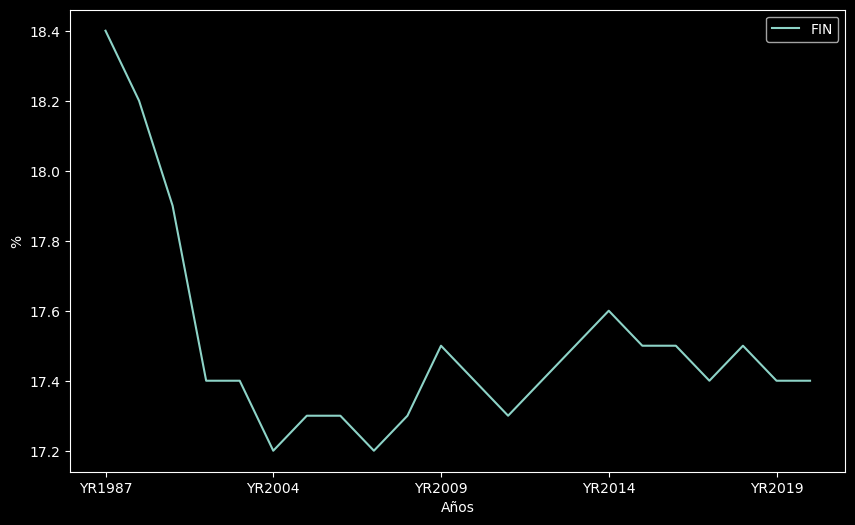

In [352]:
   
    qq1 = q3.loc['FIN'].to_frame().dropna()
    qq1.plot(kind='line', title='', xlabel='Años', ylabel='%',figsize=(10, 6))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # mostrar gráfica
    plt.show()

**Para el quantil mas rico:**

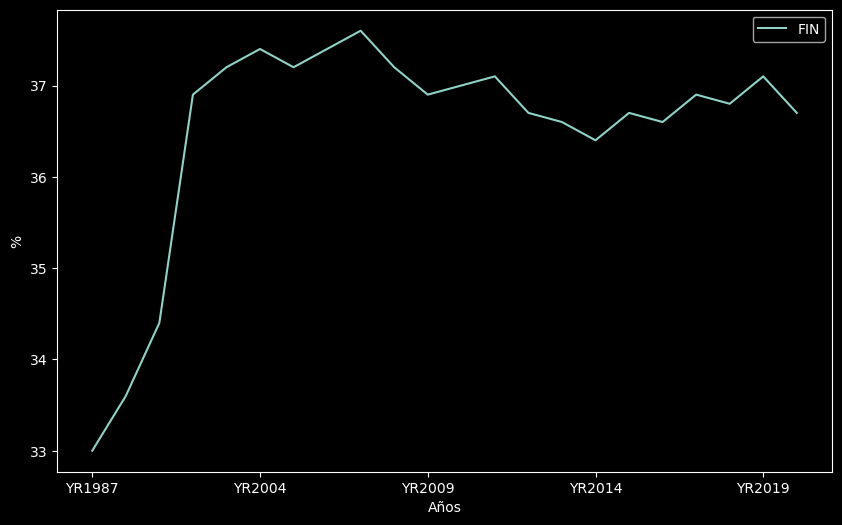

In [354]:
   
    qq1 = q5.loc['FIN'].to_frame().dropna()
    qq1.plot(kind='line', title='', xlabel='Años', ylabel='%',figsize=(10, 6))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # mostrar gráfica
    plt.show()

In [356]:
result2 = pd.concat([q1.loc['FIN'].to_frame().dropna()['FIN'],
                    q2.loc['FIN'].to_frame().dropna()['FIN'],
                    q3.loc['FIN'].to_frame().dropna()['FIN'],
                    q4.loc['FIN'].to_frame().dropna()['FIN'],
                    q5.loc['FIN'].to_frame().dropna()['FIN']], axis=1)


In [358]:
result2.columns = ['BAJA','media Baja' ,'MEDIA' ,'media Alta' ,'ALTA']

In [359]:
result2[:5]

,BAJA,media Baja,MEDIA,media Alta,ALTA
YR1987,10.8,15.2,18.4,22.6,33.0
YR1991,10.7,14.9,18.2,22.6,33.6
YR1995,10.8,14.8,17.9,22.1,34.4
YR2000,9.6,14.0,17.4,22.1,36.9
YR2003,9.4,13.9,17.4,22.1,37.2


**Se puede apreciar que la clase media alta varia muy poco**

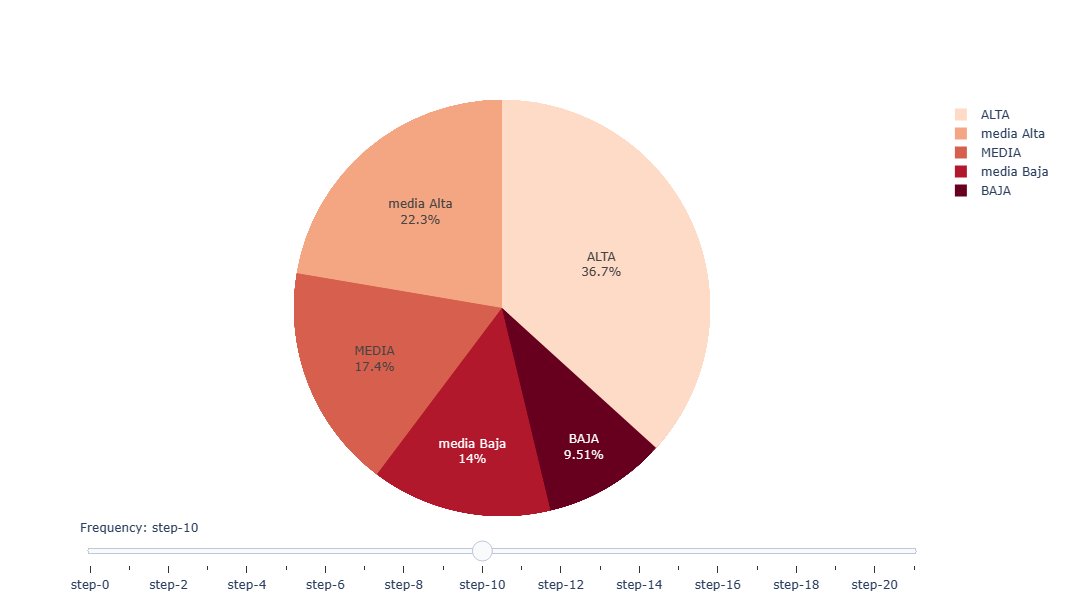

In [360]:

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in range(len(result2)):
    fig.add_trace(
        go.Pie(labels=result2.columns, values=result2.iloc[step].tolist(), marker=dict(colors=px.colors.sequential.RdBu)))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    # fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

# # Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "año: " + result2.index.tolist()[i]}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active= 10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 0},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,width=800, height=600
    # margin=dict(t=0, b=0, l=0, r=0)
)

fig.show()

**Veamos el GNI**

In [363]:
gni2 = gni.loc['FIN'].to_frame().dropna()

In [364]:
gni2

,FIN
YR1962,1370.0
YR1963,1470.0
YR1964,1620.0
YR1965,1810.0
YR1966,1970.0
YR1967,2060.0
YR1968,2090.0
YR1969,2270.0
YR1970,2460.0
YR1971,2690.0


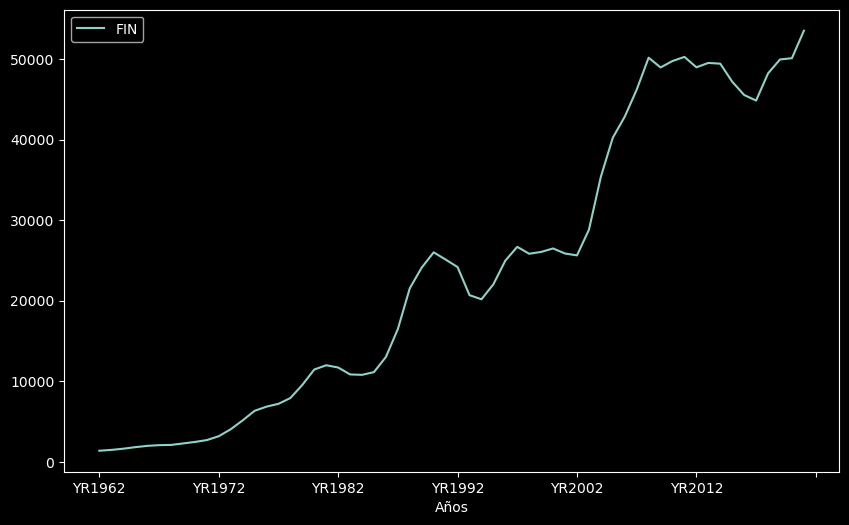

In [367]:
    # qq1 = gni2.loc['FIN'].to_frame().dropna()
    gni2.plot(kind='line', title='', xlabel='Años', ylabel='',figsize=(10, 6))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # mostrar gráfica
    plt.show()

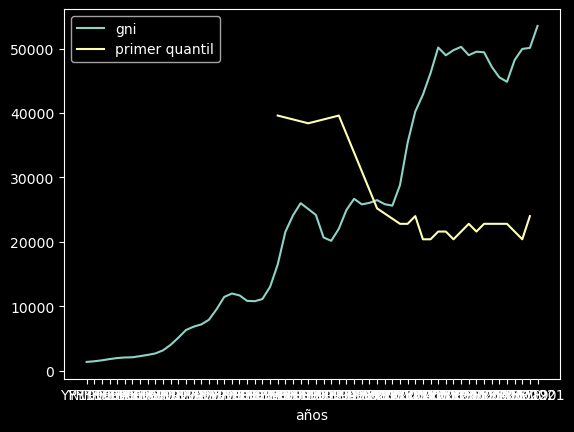

In [430]:
df1 = gni2
df2 = q1.loc['FIN'].to_frame().dropna().apply(lambda x: x * 12000).apply(lambda x: x - 90000)


x1 = df1.index
y1 = df1['FIN']

x2 = df2.index
y2 = df2['FIN']

fig, ax = plt.subplots()

ax.plot(x1, y1, label='gni')
ax.plot(x2, y2, label='primer quantil')

ax.set_xlabel('años')
ax.set_ylabel('')
ax.legend()

plt.show()

**Vemos un comportamiento interesante, en el crecimiento luego de la meseta se da simultaneamente un decrecimiento en la porcion del quantil mas pobre**

**Quiero ver si sucede lo mismo que en argentina**

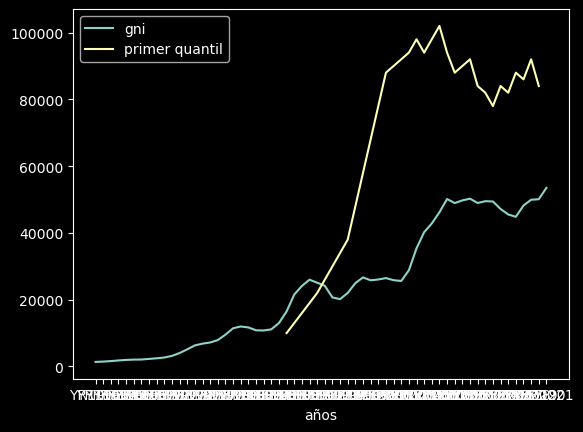

In [431]:
df1 = gni2
df2 = q5.loc['FIN'].to_frame().dropna().apply(lambda x: x * 20000).apply(lambda x: x - 650000)


x1 = df1.index
y1 = df1['FIN']

x2 = df2.index
y2 = df2['FIN']

fig, ax = plt.subplots()

ax.plot(x1, y1, label='gni')
ax.plot(x2, y2, label='primer quantil')

ax.set_xlabel('años')
ax.set_ylabel('')
ax.legend()

plt.show()

**Al contrario que en el quantil mas bajo, se experimenta un crecimiento partiendo de la meseta.**

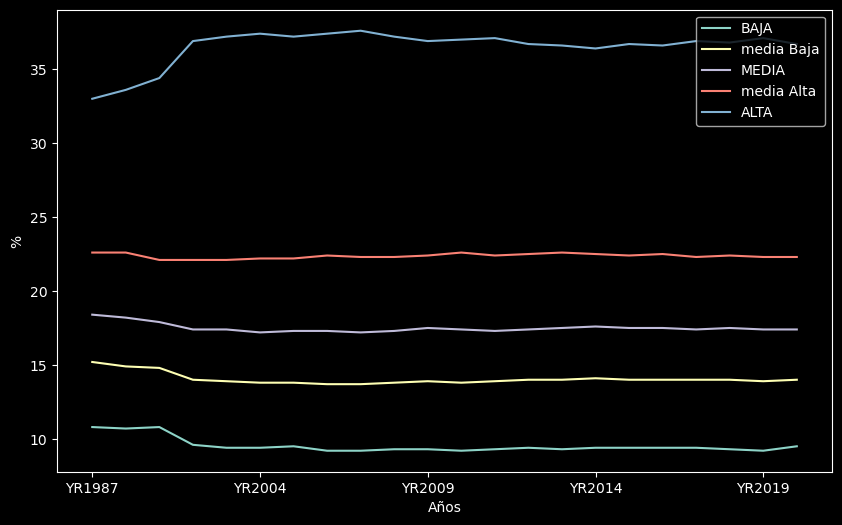

In [428]:
# crear gráfica
result2.plot(kind='line', title='', xlabel='Años', ylabel='%',figsize=(10, 6))
# fig, ax = plt.subplots(figsize=(10, 6))
# mostrar gráfica
plt.show()

**sicedio lo mismo, cuando hubo un aumento en la porcion de la clase Alta se dio una disminucion en la porcion de las demas clases y en este caso se dio que la media Alta vario muy poco**

**No significa necesariamente que la clase alta le quite a las demas, solo que la porcion del total es mayor. Puede que el pais se haya enriquecido y la clase Alta fue la que se beneficio principalmente de ello y si miramos la grafica de GNI con los quantiles podemos ver que ese fue el caso**

**Las variaciones en la porciones de cada quantil vario mucho menos que en Argentina**

In [407]:
result2.max()-result2.min()

BAJA          1.6
media Baja    1.5
MEDIA         1.2
media Alta    0.5
ALTA          4.6
dtype: float64

**Y la tasa de incidencia en la pobreza es mucho menor a diferencia de ARGENTINA**

In [410]:
sin_casa.loc['FIN'].to_frame().dropna()

,FIN
YR2003,11.0
YR2004,11.7
YR2005,12.6
YR2006,13.0
YR2007,13.6
YR2008,13.8
YR2009,13.1
YR2010,13.7
YR2011,13.2
YR2012,11.8
